# OLS Regression with Interaction Effects and ANOVA

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import itertools
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load cleaned data
df = pd.read_csv("../data/clean_reclean/ordinal_numerized_cleaned.csv")

# Drop ID column if present
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


In [3]:
# Define top 6 binary/ordinal features (from previous selection)
features = [
    'ExterQual_code',
    'KitchenQual_code',
    'BsmtQual_code',
    'GarageFinish_code',
    'HeatingQC_code',
    'BsmtExposure_code'
]

# Drop rows with missing SalePrice or selected features (should already be clean, but just in case)
df = df.dropna(subset=features + ['SalePrice'])


In [4]:
# Build formula with main effects + 2-way interactions
main_effects = ' + '.join(features)
interactions = ' + '.join([f"{a}:{b}" for a, b in itertools.combinations(features, 2)])
formula = f"SalePrice ~ {main_effects} + {interactions}"

print(f"Model formula:\n{formula}\n")

# Fit the OLS model
model = ols(formula, data=df).fit()


Model formula:
SalePrice ~ ExterQual_code + KitchenQual_code + BsmtQual_code + GarageFinish_code + HeatingQC_code + BsmtExposure_code + ExterQual_code:KitchenQual_code + ExterQual_code:BsmtQual_code + ExterQual_code:GarageFinish_code + ExterQual_code:HeatingQC_code + ExterQual_code:BsmtExposure_code + KitchenQual_code:BsmtQual_code + KitchenQual_code:GarageFinish_code + KitchenQual_code:HeatingQC_code + KitchenQual_code:BsmtExposure_code + BsmtQual_code:GarageFinish_code + BsmtQual_code:HeatingQC_code + BsmtQual_code:BsmtExposure_code + GarageFinish_code:HeatingQC_code + GarageFinish_code:BsmtExposure_code + HeatingQC_code:BsmtExposure_code



In [5]:
# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:\n")
print(anova_table)


ANOVA Table:

                                           sum_sq      df          F  \
ExterQual_code                       1.179770e+11     1.0  52.084007   
KitchenQual_code                     2.256834e+11     1.0  99.633757   
BsmtQual_code                        1.451430e+11     1.0  64.077142   
GarageFinish_code                    1.540634e+11     1.0  68.015277   
HeatingQC_code                       1.865957e+09     1.0   0.823775   
BsmtExposure_code                    1.148068e+11     1.0  50.684448   
ExterQual_code:KitchenQual_code      3.637203e+10     1.0  16.057375   
ExterQual_code:BsmtQual_code         3.503570e+08     1.0   0.154674   
ExterQual_code:GarageFinish_code     7.065845e+08     1.0   0.311940   
ExterQual_code:HeatingQC_code        9.975241e+09     1.0   4.403828   
ExterQual_code:BsmtExposure_code     2.515135e+09     1.0   1.110371   
KitchenQual_code:BsmtQual_code       1.167409e+10     1.0   5.153827   
KitchenQual_code:GarageFinish_code   3.787149e+08 

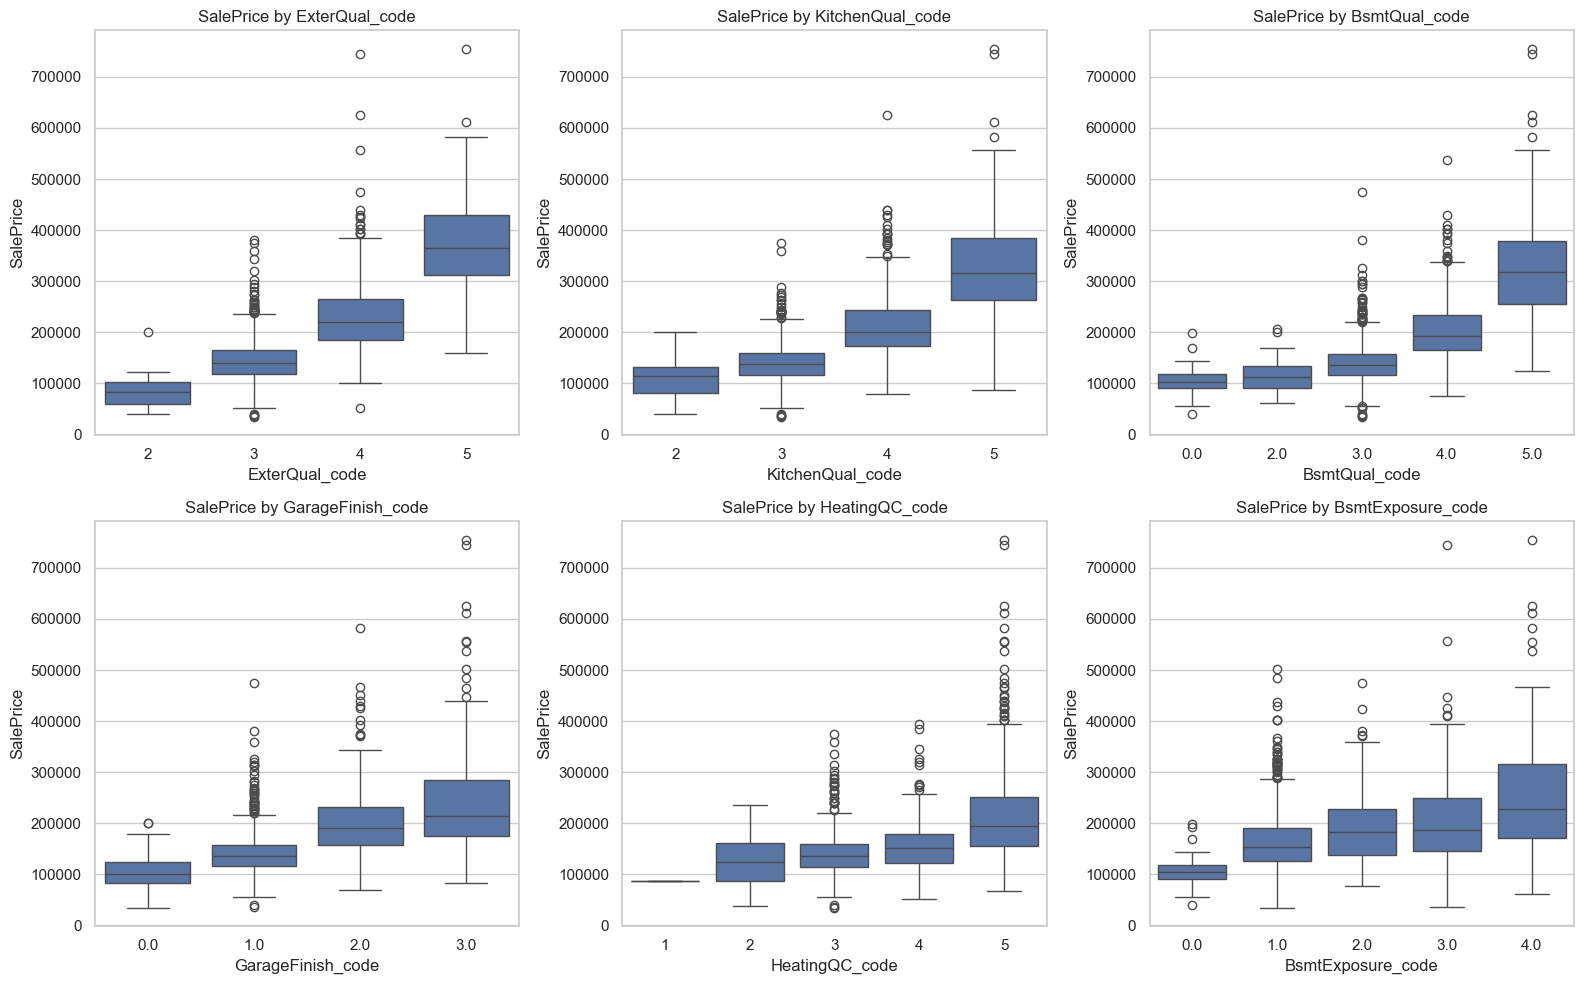

In [6]:
# Plot main effects
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for i, var in enumerate(features):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=axs[i // 3][i % 3])
    axs[i // 3][i % 3].set_title(f"SalePrice by {var}")
plt.tight_layout()
plt.show()
